<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_20_Seaborn Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Top Locations for Job Postings

In [6]:
df_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

<Axes: xlabel='count', ylabel='job_location'>

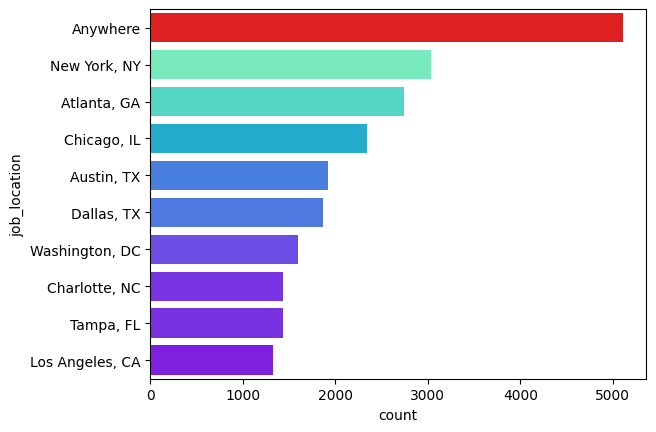

In [14]:
df_top_loc = df_US['job_location'].value_counts().head(10).to_frame()
sns.barplot(data=df_top_loc , palette='rainbow' , hue = 'count' ,x = 'count' , y='job_location' ,legend=False)


## 🟩 Different Requirements for Jobs Check

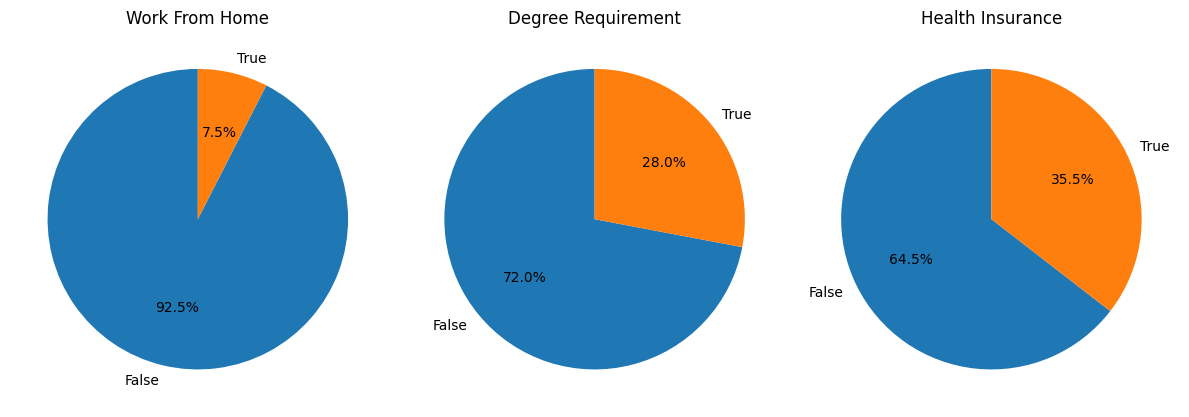

In [31]:
dict_col = {
    'job_work_from_home' : 'Work From Home' , 
    'job_no_degree_mention' : 'Degree Requirement' , 
    'job_health_insurance' : 'Health Insurance'
}

fig, ax = plt.subplots(1 , 3)
fig.set_size_inches(12,5)

for i, (title , txt) in enumerate(dict_col.items()):
    df_US[title].value_counts().plot(kind = 'pie' , ax = ax[i] ,startangle = 90, autopct = '%1.1f%%')
    ax[i].set_title(txt)
    ax[i].set_ylabel('')

fig.tight_layout()

## 🟩 Top Companies for Posting Jobs

<Axes: xlabel='count', ylabel='company_name'>

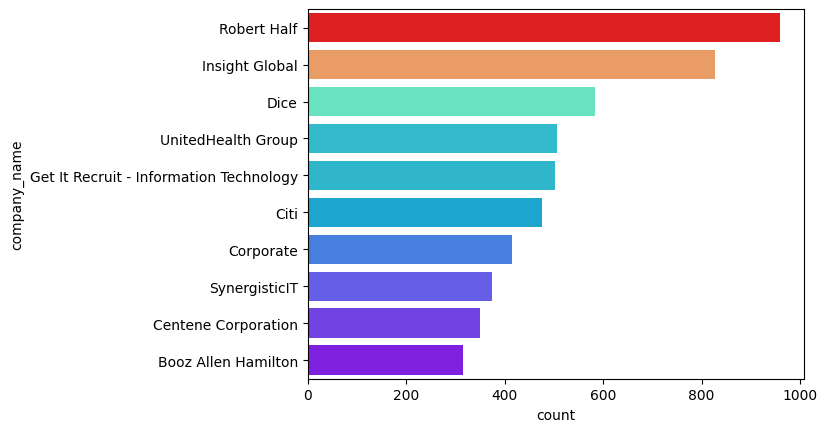

In [32]:
df_top_loc = df_US['company_name'].value_counts().head(10).to_frame()
sns.barplot(data=df_top_loc , palette='rainbow' , hue = 'count' ,x = 'count' , y='company_name' ,legend=False)
